In [7]:
import proplot as pplt
import numpy as np
from ruamel.yaml import YAML
import xarray as xr

from pathlib import Path

In [8]:
plotting_dir = Path("plots/top_ensemble/ec-earth-4")
plotting_dir.mkdir(exist_ok=True, parents=True)
ensemble_directory = Path("output/top_ensemble")

In [9]:
schwarz_directories = []
yaml = YAML(typ="unsafe", pure=True)
for date_dir in ensemble_directory.glob("*"):
    if date_dir.is_dir():
        schwarz_directories.append(date_dir / "schwarz")
experiments = []
for schwarz_dir in schwarz_directories:
    with open(schwarz_dir / "setup_dict.yaml") as yaml_file:
        experiment = yaml.load(yaml_file)
        converged = (
            experiment.iterate_converged["2-norm"]
            and experiment.iterate_converged["inf-norm"]
        )
        if converged:
            experiments.append(experiment)

iterations = np.array([experiment.iteration for experiment in experiments])
# start_dates = np.array([schwarz_dict["run_start_date"] for schwarz_dict in schwarz_dicts])
iterations = xr.DataArray(iterations, name="iterations")

In [10]:
iteration_count = iterations.groupby(iterations).count()
iteration_count.name = "Iteration Count"

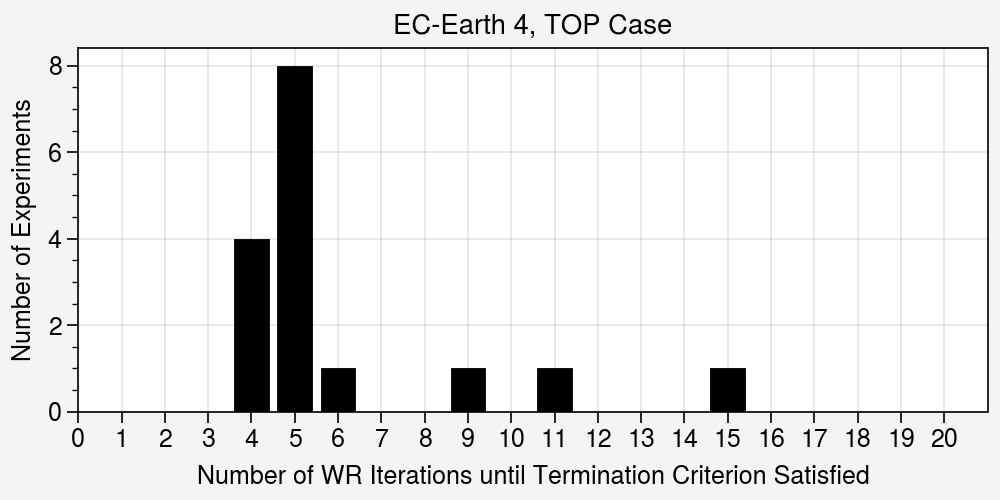

In [11]:
fig, ax = pplt.subplots(width="40em", height="20em")
ax.bar(iteration_count, absolute_width=True, color="k")
ax.format(
    xlabel="Number of WR Iterations until Termination Criterion Satisfied",
    ylabel="Number of Experiments",
    xlim=[0, 21],
    xticks=np.arange(0, 21),
    xtickminor=False,
    title="EC-Earth 4, TOP Case",
)
fig.savefig(plotting_dir / "swr_iteration_count.pdf")

In [12]:
iterations.median()

<xarray.DataArray 'iterations' ()> Size: 8B
array(5.)